In [3]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [39]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên

transactions= pd.read_excel('KPMG.xlsx')
print(transactions.head(5))



   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [41]:
# in ra info bảng
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [54]:
# describe default
print(transactions.describe())

       transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.

In [55]:
# describe các biến object
print(transactions.describe(include=[object]))

       order_status  brand product_line product_class product_size
count         20000  19803        19803         19803        19803
unique            2      6            4             3            3
top        Approved  Solex     Standard        medium       medium
freq          19821   4253        14176         13826        12990


In [56]:
# describe all
print(transactions.describe(include='all'))

        transaction_id   product_id   customer_id     transaction_date  \
count     20000.000000  20000.00000  20000.000000                20000   
unique             NaN          NaN           NaN                  364   
top                NaN          NaN           NaN  2017-02-14 00:00:00   
freq               NaN          NaN           NaN                   82   
first              NaN          NaN           NaN  2017-01-01 00:00:00   
last               NaN          NaN           NaN  2017-12-30 00:00:00   
mean      10000.500000     45.36465   1738.246050                  NaN   
std        5773.647028     30.75359   1011.951046                  NaN   
min           1.000000      0.00000      1.000000                  NaN   
25%        5000.750000     18.00000    857.750000                  NaN   
50%       10000.500000     44.00000   1736.000000                  NaN   
75%       15000.250000     72.00000   2613.000000                  NaN   
max       20000.000000    100.00000   

/var/folders/jm/p19zymmn4cvb8j0vgkl9rmkm0000gn/T/ipykernel_31516/2773332739.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(transactions.describe(include='all'))


In [57]:
# count số dòng bị null ở mỗi cột
print(transactions.isna().sum())


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


# 1. Data Correction

## 1.1 Drop NA

In [75]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info

transactions_dropna_all= transactions.dropna()
print(df_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [76]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
transactions_dropna_online_order=transactions.dropna(subset='online_order')
print(df_dropna_online_order.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [77]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
transactions_fillna_0= transactions.fillna(0)
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [78]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
transactions_fillna_ffill=transactions.fillna('ffill')
print(df_fillna_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  object        
 12  product_first_sold_date  20000 n

In [79]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
transactions_fillna_bfill=transactions.fillna('bfill')
print(df_fillna_bfill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  object        
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [72]:
# load sheet Demographic và hiển thị 5 dòng đầu tiên
Demographic= pd.read_excel('KPMG.xlsx', sheet_name=2)
print(Demographic.head(5))


   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

/var/folders/jm/p19zymmn4cvb8j0vgkl9rmkm0000gn/T/ipykernel_31516/241892189.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  Demographic= pd.read_excel('KPMG.xlsx', sheet_name=2)


In [73]:
# in ra info bảng
print(Demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [74]:
# describe các giá trị object
print(Demographic.describe(include=[object]))

       first_name last_name  gender                             job_title  \
count        4000      3875    4000                                  3494   
unique       3139      3725       6                                   195   
top           Max  Pristnor  Female  Business Systems Development Analyst   
freq            5         3    2037                                    45   

       job_industry_category wealth_segment deceased_indicator  default  \
count                   3344           4000               4000     3698   
unique                     9              3                  2       90   
top            Manufacturing  Mass Customer                  N      100   
freq                     799           2000               3998      113   

       owns_car  
count      4000  
unique        2  
top         Yes  
freq       2024  


In [194]:
# Remove all NA rows, then use output for the following steps
Demographic_dropna_all= Demographic.dropna()
print(Demographic_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   customer_id                          2630 non-null   int64          
 1   first_name                           2630 non-null   object         
 2   last_name                            2630 non-null   object         
 3   gender                               2630 non-null   object         
 4   past_3_years_bike_related_purchases  2630 non-null   int64          
 5   DOB                                  2630 non-null   datetime64[ns] 
 6   job_title                            2630 non-null   object         
 7   job_industry_category                2630 non-null   object         
 8   wealth_segment                       2630 non-null   object         
 9   deceased_indicator                   2630 non-null   object         
 10  

In [160]:
# In ra các giá trị unique của cột gender
import numpy as np
print(np.unique(Demographic_dropna_all['gender']))

['F' 'Femal' 'Female' 'Male']


In [168]:
# Quy chuẩn cột gender về các nhóm Male, Female, Unisex và in ra giá trị unique mới
Demographic_dropna_all['gender']=Demographic_dropna_all['gender'].replace(['F','Femal','Female','Male'],
                                                    ['Female','Female','Female','Male'])
print(np.unique(Demographic_dropna_all['gender']))

['Female' 'Male']


/var/folders/jm/p19zymmn4cvb8j0vgkl9rmkm0000gn/T/ipykernel_31516/1676778392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demographic_dropna_all['gender']=Demographic_dropna_all['gender'].replace(['F','Femal','Female','Male'],


In [293]:
# Tính tuổi của mỗi khách hàng, lưu vào cột "age" và in ra min age, max age
time_today= dt.datetime.today().year
Demographic_dropna_all['age']= time_today-Demographic_dropna_all['DOB'].dt.strftime('%Y').astype(int)

print(Demographic_dropna_all['age'].min())
print(Demographic_dropna_all.age.max())




20
91


/var/folders/jm/p19zymmn4cvb8j0vgkl9rmkm0000gn/T/ipykernel_31516/4294092096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demographic_dropna_all['age']= time_today-Demographic_dropna_all['DOB'].dt.strftime('%Y').astype(int)


In [174]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
Demographic_dropna_all['age_group']=pd.cut(x=Demographic_dropna_all['age'],bins=[0,35,55,100],
                                           labels=['Young','Middle','Older'])

print(Demographic_dropna_all['age_group'])


0        Older
1       Middle
2        Older
8       Middle
9        Young
         ...  
3992    Middle
3993     Young
3994    Middle
3995    Middle
3996     Young
Name: age_group, Length: 2630, dtype: category
Categories (3, object): ['Young' < 'Middle' < 'Older']


/var/folders/jm/p19zymmn4cvb8j0vgkl9rmkm0000gn/T/ipykernel_31516/1188577741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demographic_dropna_all['age_group']=pd.cut(x=Demographic_dropna_all['age'],bins=[0,35,55,100],


# 2. Data Completeness

In [22]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)


In [189]:
merge=transactions_dropna_all.merge(Demographic_dropna_all,on='customer_id', how ='left')
print(merge[merge['first_name'].isna()])

       transaction_id  product_id  customer_id transaction_date  online_order  \
4                   5          78          787       2017-10-01           1.0   
7                   8          15         2459       2017-07-15           0.0   
10                 11           5         1986       2017-01-17           0.0   
16                 17          79         2426       2017-04-03           0.0   
24                 25          89         2822       2017-06-11           0.0   
...               ...         ...          ...              ...           ...   
19433           19989           0          714       2017-04-27           1.0   
19436           19992          11         1374       2017-09-14           0.0   
19437           19993          13            5       2017-04-28           0.0   
19438           19994          77         2618       2017-12-23           0.0   
19443           19999           6         2764       2017-07-03           0.0   

      order_status         

# 3. Data Aggregation (after dropping null values)

In [229]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
#countsos khach hangf
merge_dropna_all=merge.dropna()
transaction_per_customer=merge_dropna_all['customer_id'].nunique()
khach_hang_co_phat_sinh_gd= Demographic_dropna_all['customer_id'].count()-transaction_per_customer
print(khach_hang_co_phat_sinh_gd)

301


In [235]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
transactions_dropna_all['year_month']= transactions_dropna_all['transaction_date'].dt.strftime('%Y-%m')
customers_per_month=transactions_dropna_all.groupby('year_month')['customer_id'].nunique()
print(customers_per_month)

year_month
2017-01    1321
2017-02    1258
2017-03    1277
2017-04    1284
2017-05    1281
2017-06    1238
2017-07    1327
2017-08    1346
2017-09    1240
2017-10    1378
2017-11    1281
2017-12    1294
Name: customer_id, dtype: int64


/var/folders/jm/p19zymmn4cvb8j0vgkl9rmkm0000gn/T/ipykernel_31516/562747982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_dropna_all['year_month']= transactions_dropna_all['transaction_date'].dt.strftime('%Y-%m')


In [246]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
transactions_dropna_all['gross_margin']= transactions_dropna_all.list_price-transactions_dropna_all.standard_cost
print(transactions_dropna_all.groupby('year_month')['gross_margin'].sum())


year_month
2017-01    915151.359988
2017-02    852514.230000
2017-03    865312.550000
2017-04    888856.890000
2017-05    904003.210000
2017-06    841815.260000
2017-07    919677.790000
2017-08    951376.270000
2017-09    843736.130000
2017-10    968986.414984
2017-11    900817.570000
2017-12    876568.660000
Name: gross_margin, dtype: float64


/var/folders/jm/p19zymmn4cvb8j0vgkl9rmkm0000gn/T/ipykernel_31516/1707308117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_dropna_all['gross_margin']= transactions_dropna_all.list_price-transactions_dropna_all.standard_cost


## Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg



In [258]:
#số lượng order
order_number_table=transactions_dropna_all[transactions_dropna_all.online_order ==True]
order_number_table_approved=order_number_table[order_number_table.order_status=='Approved']
order_number=order_number_table_approved.online_order.count()
print(order_number)
#doanh thu group by online_order và order_status 
list_price_by_order_and_status=transactions_dropna_all.groupby(['online_order','order_status'])['list_price'].sum()
print(list_price_by_order_and_status)

9642
online_order  order_status
0.0           Approved        10666230.05
              Cancelled          86837.88
1.0           Approved        10670179.59
              Cancelled         108924.20
Name: list_price, dtype: float64


# 4. Data Visualization

In [27]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
# Comment insight/message muốn truyền tải thông qua từng chart






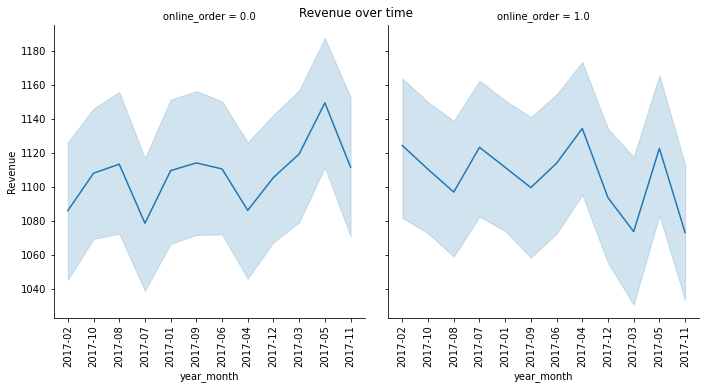

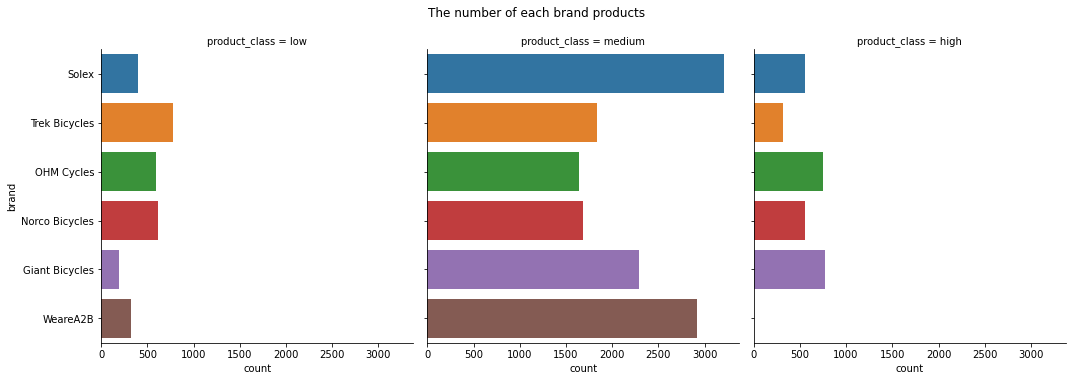

In [270]:
#line chart: the number of revenue by year_month and show subplot by online_order. 
#This shows how the company's revenue grows over the time with order or no order products
import seaborn as sns
import matplotlib.pyplot as plt
table1=sns.relplot(x='year_month',y='list_price', data=transactions_dropna_all,
           kind='line', col='online_order')
table1.fig.suptitle("Revenue over time")
table1.set(xlabel='year_month',
		ylabel='Revenue')
table1.set_xticklabels(rotation=90)
plt.show()


#Count: The number of each brand products and show subplot by product_class. 
#This tells which product brands are selling well and which are not popular for each product_class.
table2=sns.catplot(y='brand', data=transactions_dropna_all,
           kind='count', col='product_class', col_order=['low','medium','high'])
table2.fig.suptitle("The number of each brand products", y=1.05)
table2.set(xlabel='count',
		ylabel='brand')
plt.show()

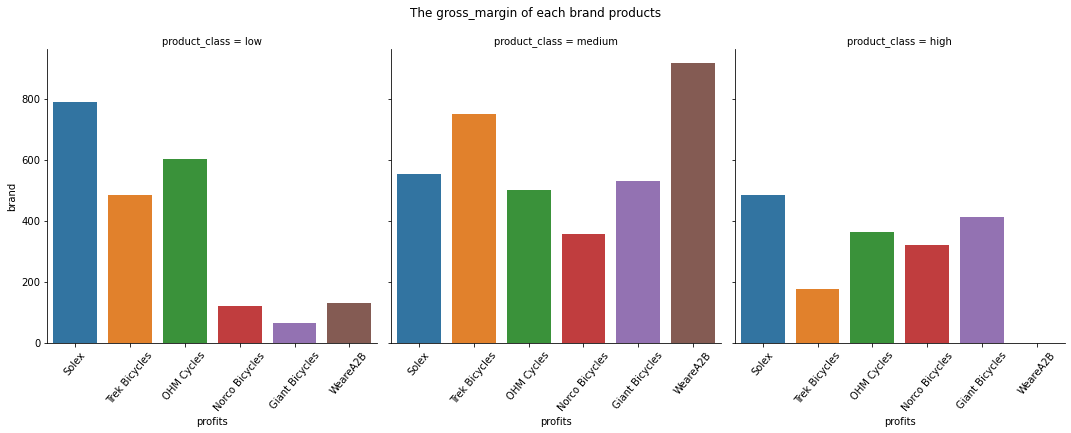

In [274]:
#Barplot: the gross_margin of each brand products and show subplot by products_class
#This indicates which product brands brings more profits for each product_class.
table3=sns.catplot(x='brand',y='gross_margin', data=transactions_dropna_all,
           kind='bar', col='product_class', col_order=['low','medium','high'], ci=None)
table3.fig.suptitle("The gross_margin of each brand products", y=1.05)
table3.set(xlabel='profits',
		ylabel='brand')
table3.set_xticklabels(rotation=50)
plt.show()

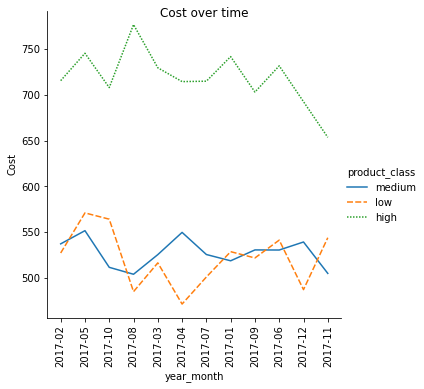

In [283]:
#multiple line: the number of cost by year_month and product_class
table4=sns.relplot(x='year_month',y='standard_cost', data=transactions_dropna_all,
           kind='line',hue='product_class', style='product_class', ci=None)
table4.fig.suptitle("Cost over time")
table4.set(xlabel='year_month',
		ylabel='Cost')
table4.set_xticklabels(rotation=90)
plt.show()


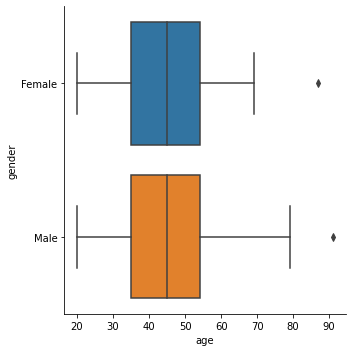

In [295]:
#box plot: demographic customer.

table5= sns.catplot(data=Demographic_dropna_all, x="age", y="gender", kind='box')
table5.fig.suptitle("Demographic customer")